# **Project Transport - part 1 - data preparation**

### **1. Objectives of this part of the project**

1. Our goal is to obtain all data from all sources,
2. We also need to calculate the distances between zones, and also calculate the nearest distances from each zone to various objects (train stations, bus lines, etc.).
3. Combine all received data into one database.

### **2.1 Libraries**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import shapely.geometry as geom
import numpy as np
import pandas as pd
import geopandas as gpd
import time

In [ ]:
# Loading data files from google.disk to google.colab

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/'
# path = '.'

Mounted at /content/drive


###  **2.2 Geodata for each zone in Israel - Data of 1270 zones**

In [ ]:
# Data frame with the division of Israel into 1270 regions => Israel1270
# source data: https://data.gov.il/dataset/tripscelular_1819

zones = gpd.read_file(path + '/Data/celular1819_v1.3/Shape_files/1270_02.09.2021.shp')
zones = zones.drop(columns=["CITY", "NEIGHBOURH", "DISTRIC", "SUBDISTRIC"])
zones.head()

,TAZ_1270,TAZ_250,TAZ_33,TAZ_15,AREA,geometry
0,100289,2000135,300024,40000010,1678765.0,"POLYGON ((189199.490 647447.099, 189177.763 64..."
1,100288,2000135,300024,40000010,616651.0,"POLYGON ((189774.482 648084.239, 189676.970 64..."
2,100287,2000125,300023,40000010,241514.0,"POLYGON ((183013.975 642214.051, 183015.433 64..."
3,100286,2000125,300023,40000010,1215478.0,"POLYGON ((182537.693 641524.481, 182521.968 64..."
4,100047,2000173,300019,40000008,2050799.0,"POLYGON ((179454.925 661641.594, 179474.747 66..."


### **2.3 Geodata for fast train stops - LRT station (rakevet kala)**

##### Load the LRT station data ( rakevet kala)

In [ ]:
# source data: https://data.gov.il/dataset/lrt_stat

LRT_stations = gpd.read_file(path + '/Data/Rakevet_Kala/LRT_STAT.shp')


(650000.0, 675000.0)

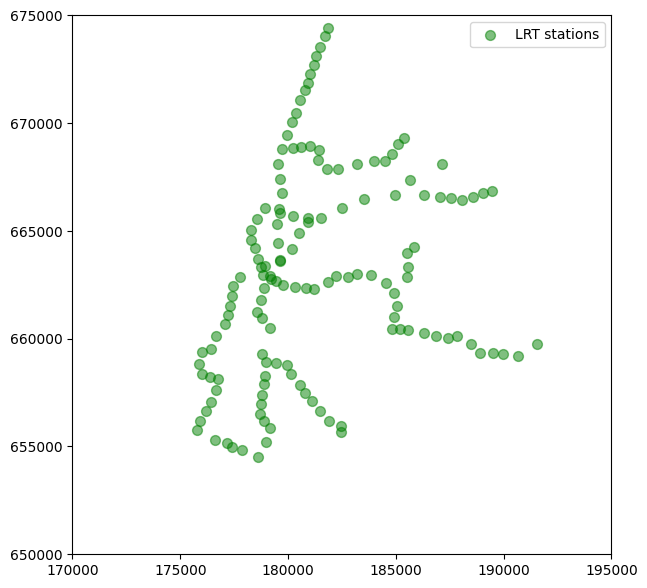

In [ ]:
# Presentation of LRT stations  in the Tel Aviv metropolis

ax = LRT_stations.plot(figsize =(7,7), color ='green', markersize=50, alpha=0.5)
#ax.axis('off')
ax.legend(['LRT stations'])
ax.set_xlim([170000, 195000])
ax.set_ylim([650000, 675000])

##### Calculation of the distance to the nearest LRT station

In [ ]:
# Calculate the distance from each zone to the nearest LRT station
zones['LRT_Distance'] = zones.geometry.apply(lambda x: LRT_stations.distance(x).min())
zones.head(2)

,TAZ_1270,TAZ_250,TAZ_33,TAZ_15,AREA,geometry,LRT_Distance
0,100289,2000135,300024,40000010,1678765.0,"POLYGON ((189199.490 647447.099, 189177.763 64...",7956.396150
1,100288,2000135,300024,40000010,616651.0,"POLYGON ((189774.482 648084.239, 189676.970 64...",9720.506931


### **2.4 Geodata for bus lines with a large number of passengers - Heavy passenger lines  (TMA - Kavim-Amusim)**

##### Load the Heavy passenger lines data

In [ ]:
# source data: https://data.gov.il/dataset/tma_23a4_lines

TMA_lines = gpd.read_file(path + 'Data/Kavim-Amusim-2023/TMA_23A4_LINES.shp')

(640000.0, 680000.0)

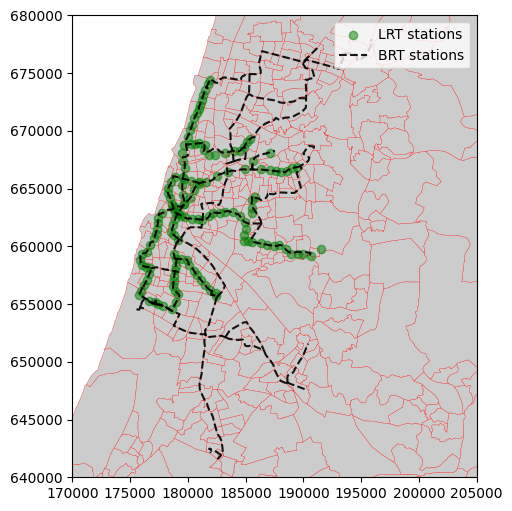

In [ ]:
# Presentation of  zones, heavy passenger lines  and  LRT stations in the Tel Aviv metropolis

fig, ax = plt.subplots(1, figsize =(10,6))
zones.plot(ax=ax, color ='#CCCCCC', edgecolor = '#FF0000', linewidth = 0.2)
LRT_stations.plot(ax=ax, color ='green', alpha=0.5)
TMA_lines.plot(ax=ax, color ='black' , linestyle ='--', alpha=0.9)

ax.legend(['LRT stations', 'BRT stations','TMA lines'])

ax.set_xlim([170000, 205000])
ax.set_ylim([640000, 680000])

##### Calculation of the distance to the nearest TMA ( busy transportation lines - Kavim-Amusim)

In [ ]:
# Calculate the distance from each zone to the nearest TMA line

zones['TMA_Distance'] = zones.geometry.apply(lambda x: TMA_lines.distance(x).min())
zones.head(2)

,TAZ_1270,TAZ_250,TAZ_33,TAZ_15,AREA,geometry,LRT_Distance,TMA_Distance
0,100289,2000135,300024,40000010,1678765.0,"POLYGON ((189199.490 647447.099, 189177.763 64...",7956.396150,0.000000
1,100288,2000135,300024,40000010,616651.0,"POLYGON ((189774.482 648084.239, 189676.970 64...",9720.506931,300.055185


### **2.5 Level of vehicles - number of cars per 1000 inhabitants in each zone (MotoRate)**

In [ ]:
# Load the level of vehicles data (MotoRate)
# source data: https://data.gov.il/dataset/taz_mot_rate_2040

MotoRate = gpd.read_file(path + '/Data/Cars-2024/TAZ_MOT_RATE_2040.shp')

In [ ]:
MotoRate.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    585 non-null    int64   
 1   MOTORATE40  585 non-null    float64 
 2   SHAPE_Leng  585 non-null    float64 
 3   SHAPE_Area  585 non-null    float64 
 4   geometry    585 non-null    geometry
dtypes: float64(3), geometry(1), int64(1)
memory usage: 23.0 KB


(630000.0, 675000.0)

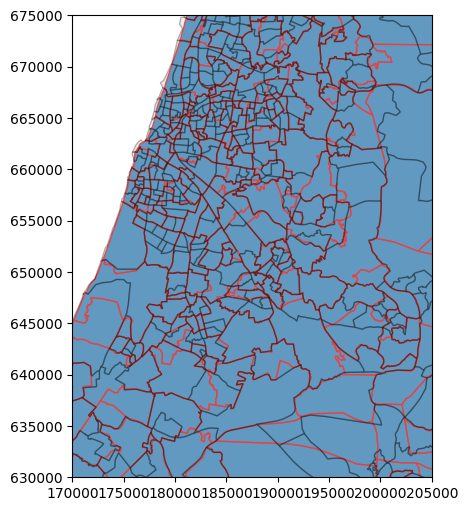

In [ ]:
# Represent the location of Zones (edgecolor = 'red') and MotoRate zones (edgecolor = black)

fig, ax = plt.subplots(1, figsize =(6,6))
MotoRate.plot(ax=ax, edgecolor = 'red', linewidth = 1, alpha=0.9)
zones.plot(ax=ax, color ='#CCCCCC', edgecolor = 'black', linewidth = 1, alpha=0.3)

ax.set_xlim([170000, 205000])
ax.set_ylim([630000, 675000])

##### Calculate  Vehicles Level for each zone

In [ ]:
# Matrix of shared areas between each zone and each MotoRate zone

Zone_MotoRate_area = MotoRate.geometry.apply(lambda x: zones.intersection(x , align=False).area )
Zone_MotoRate_area

,0,1,2,3,4,5,6,7,8,9,...,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
581,0.0,0.0,0.0,0.0,0.0,75.955121,6477.280748,0.0,0.0,0.0,...,2052.742078,706939.51687,0.0,398329.202896,0.0,0.0,0.0,0.0,0.0,0.0
582,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
583,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


###### The colculation Test

In [ ]:
# Test #1
# An example of representing intersecting polygons in geoframes:
#  zones (TAZ_1270 = '100118') and MotoRate zones (OBJECTID = 224, 293, 334)

# zones = 100118
col_to_test = 580
Zone_MotoRate_area
column = Zone_MotoRate_area.loc[:, col_to_test]
filtered_rows = Zone_MotoRate_area[column > 0]
filtered_rows_list = filtered_rows.index.tolist()
print(f'the areas of joint polygon # {col_to_test} in frame ZONES and polygons in frame MotoRate:\n{filtered_rows[col_to_test]}')
print("="*20)

the areas of joint polygon # 580 in frame ZONES and polygons in frame MotoRate:
224         0.371723
293    675555.898255
334         9.998707
Name: 580, dtype: float64


(660000.0, 668000.0)

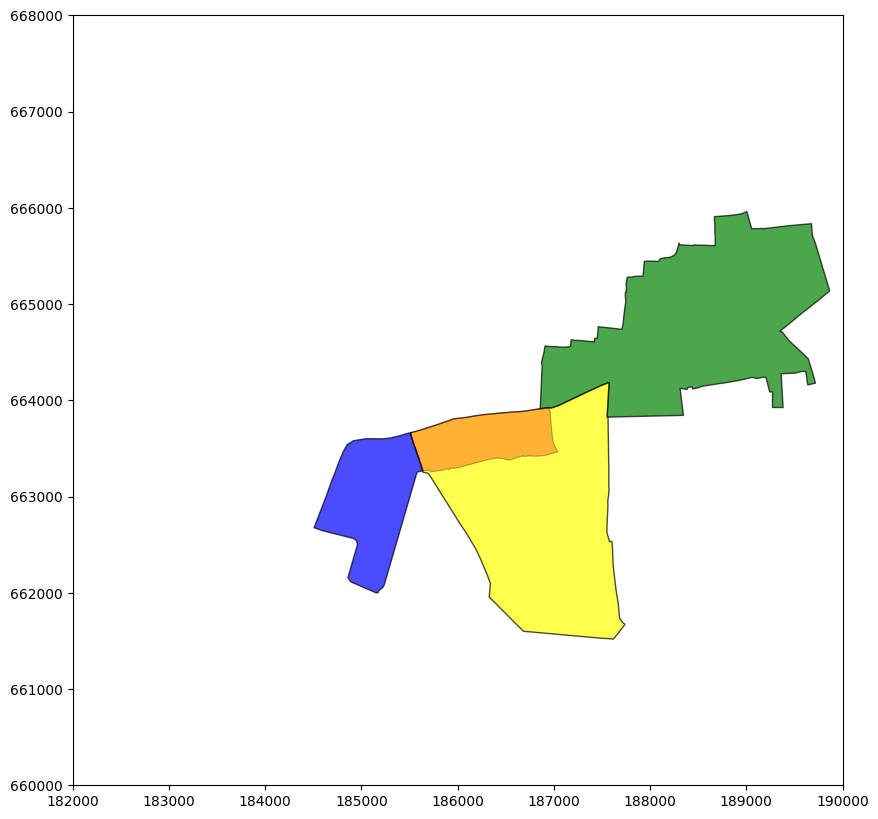

In [ ]:
# An example of representing intersecting polygons in geoframes:
#  zones (TAZ_1270 = '100118') and MotoRate zones (Index = 224, 293, 334)

#  zone (TAZ_1270 = '100118')
zones_100118 = zones[zones['TAZ_1270']==100118]

# ID_MotoRate_zones = [224, 293, 334]
ID_MotoRate_zones1 = [225]
ID_MotoRate_zones2 = [294]
ID_MotoRate_zones3 = [335]
MotoRate_zones_crosses1 = MotoRate[MotoRate['OBJECTID'].isin(ID_MotoRate_zones1)]
MotoRate_zones_crosses2 = MotoRate[MotoRate['OBJECTID'].isin(ID_MotoRate_zones2)]
MotoRate_zones_crosses3 = MotoRate[MotoRate['OBJECTID'].isin(ID_MotoRate_zones3)]


fig, ax = plt.subplots(1, figsize =(10,10))
# MotoRate.plot(ax=ax, edgecolor = 'red', alpha=0.9)
#zones[zones['TAZ_1270']==100118].plot(ax=ax, color ='#CCCCCC', edgecolor = 'black', linewidth = 0.8, alpha=0.3)
MotoRate_zones_crosses1.plot(ax=ax, color='green',edgecolor = 'black', alpha=0.7)
MotoRate_zones_crosses2.plot(ax=ax, color='yellow',edgecolor = 'black', alpha=0.7)
MotoRate_zones_crosses3.plot(ax=ax, color='blue',edgecolor = 'black', alpha=0.7)
zones_100118.plot(ax=ax, color ='red', edgecolor = 'black', linewidth = 0.8, alpha=0.3)

ax.set_xlim([182000, 190000])
ax.set_ylim([660000, 668000])

In [ ]:
# Test #2
# An example of representing intersecting polygons in geoframes:
#  zones (TAZ_1270 = '100046') and MotoRate zones (Index = 361,386,388,390,581)

# zones = 100046
col_to_test = 5
Zone_MotoRate_area
column = Zone_MotoRate_area.loc[:, col_to_test]
filtered_rows = Zone_MotoRate_area[column > 0]
filtered_rows_list = filtered_rows.index.tolist()
print(f'the areas of joint polygon # {col_to_test} in frame ZONES and polygons in frame MotoRate:\n{filtered_rows[col_to_test]}')
print("="*20)

the areas of joint polygon # 5 in frame ZONES and polygons in frame MotoRate:
361    230438.030836
386       426.389155
388       884.376871
390    214542.769086
581        75.955121
Name: 5, dtype: float64


(660000.0, 666000.0)

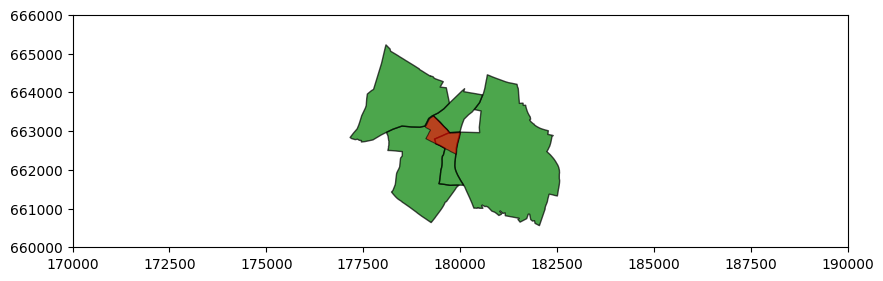

In [ ]:
# An example of representing intersecting polygons in geoframes:
#  zones (TAZ_1270 = '100046') and MotoRate zones (OBJECTID = 361,386,388,390,581)

#  zone (TAZ_1270 = '100118')
zones_100046 = zones[zones['TAZ_1270']==100046]

ID_MotoRate_zones = [362,387,389,391,582]

MotoRate_zones_crosses = MotoRate[MotoRate['OBJECTID'].isin(ID_MotoRate_zones)]



fig, ax = plt.subplots(1, figsize =(10,10))
# MotoRate.plot(ax=ax, edgecolor = 'red', alpha=0.9)
#zones[zones['TAZ_1270']==100118].plot(ax=ax, color ='#CCCCCC', edgecolor = 'black', linewidth = 0.8, alpha=0.3)
MotoRate_zones_crosses.plot(ax=ax, color='green',edgecolor = 'black', alpha=0.7)
zones_100046.plot(ax=ax, color ='red', edgecolor = 'black', linewidth = 0.8, alpha=0.6)

ax.set_xlim([170000, 190000])
ax.set_ylim([660000, 666000])

##### Calculation of the total area for joint polygons for each Zone

In [ ]:
# Calculation of the total area for joint polygons for each Zone

Zone_MotoRate_area_sum = MotoRate[MotoRate['MOTORATE40'] > 0].geometry.apply(lambda x: zones.intersection(x, align=False).area).sum()



In [ ]:
# Calculate the average Vehicles Level for each Zone
Zone_MotoRate_area_T = Zone_MotoRate_area.T

Zone_MotoRate_area_avg =     Zone_MotoRate_area_T.dot(MotoRate['MOTORATE40'])/Zone_MotoRate_area_sum
Zone_MotoRate_area_avg

0       384.908501
1       107.447514
2       589.545448
3       589.185157
4       313.021738
           ...    
1265    511.965646
1266    476.943701
1267    336.281496
1268    521.000000
1269    521.002689
Length: 1270, dtype: float64

In [ ]:
# Calculate the average Vehicles Level for each Zone
Zone_MotoRate_area_T = Zone_MotoRate_area.T

Zone_MotoRate_area_avg =     Zone_MotoRate_area_T.dot(MotoRate['MOTORATE40'])/Zone_MotoRate_area_sum
Zone_MotoRate_area_avg

0       384.908501
1       107.447514
2       589.545448
3       589.185157
4       313.021738
           ...    
1265    511.965646
1266    476.943701
1267    336.281496
1268    521.000000
1269    521.002689
Length: 1270, dtype: float64

In [ ]:
zones['MotoRate']= Zone_MotoRate_area_avg

zones.head(2)

,TAZ_1270,TAZ_250,TAZ_33,TAZ_15,AREA,geometry,LRT_Distance,TMA_Distance,MotoRate
0,100289,2000135,300024,40000010,1678765.0,"POLYGON ((189199.490 647447.099, 189177.763 64...",7956.396150,0.000000,384.908501
1,100288,2000135,300024,40000010,616651.0,"POLYGON ((189774.482 648084.239, 189676.970 64...",9720.506931,300.055185,107.447514


###### Test#1

In [ ]:
# Test#1
col_to_test = 5
Zone_MotoRate_area
column = Zone_MotoRate_area.loc[:, col_to_test]
filtered_rows = Zone_MotoRate_area[column > 0]
filtered_rows_list = filtered_rows.index.tolist()
print(f'the areas of joint polygon # {col_to_test} in frame ZONES and polygons in frame MotoRate:\n{filtered_rows[col_to_test]}')
print("="*20)
sum_column = filtered_rows[col_to_test].sum()
print(f'sum area in polygon #{col_to_test} in frame ZONES: {sum_column}')
print("="*20)
print(f'list of polygons in frame MotoRate :{filtered_rows_list}')
print("="*20)
print(f'MotoRate in polygons than joints with polygon # {col_to_test} in frame ZONES:\n{MotoRate[["OBJECTID","MOTORATE40"]].loc[filtered_rows_list]["MOTORATE40"]}')
total = (filtered_rows[col_to_test]*MotoRate.loc[filtered_rows_list]['MOTORATE40']/sum_column).sum()
print("="*20)
print(f'avarage value of MotoRate in polygon # {col_to_test} in frame ZONES: {total}')
print("="*20)
if round(zones.loc[col_to_test, 'MotoRate'],2) == round(total,2):
    print ("TEST = OK")
else:
    print (f"TEST = Fails : {zones.loc[col_to_test, 'MotoRate']} != {total} ")

the areas of joint polygon # 5 in frame ZONES and polygons in frame MotoRate:
361    230438.030836
386       426.389155
388       884.376871
390    214542.769086
581        75.955121
Name: 5, dtype: float64
sum area in polygon #5 in frame ZONES: 446367.52106939344
list of polygons in frame MotoRate :[361, 386, 388, 390, 581]
MotoRate in polygons than joints with polygon # 5 in frame ZONES:
361    313.0
386    394.0
388    336.0
390    357.0
581    398.0
Name: MOTORATE40, dtype: float64
avarage value of MotoRate in polygon # 5 in frame ZONES: 334.2856351911528
TEST = OK


###### Test#2

In [ ]:
# Test#2
col_to_test = 571
Zone_MotoRate_area
column = Zone_MotoRate_area.loc[:, col_to_test]
filtered_rows = Zone_MotoRate_area[column > 0]
filtered_rows_list = filtered_rows.index.tolist()
area_filtered_poligons = filtered_rows[col_to_test]
print(f'The areas of joint polygon # {col_to_test} in frame ZONES and polygons in frame MotoRate:\n{area_filtered_poligons}')
print("="*20)
print(f'list of polygons in frame MotoRate :{filtered_rows_list}')

print("="*20)
MotoRate_joints = MotoRate[["OBJECTID","MOTORATE40"]].loc[filtered_rows_list]["MOTORATE40"]
print(f'MotoRate in polygons than joints with polygon # {col_to_test} in frame ZONES:\n{MotoRate_joints}')

print("="*20)
sum_column = filtered_rows[col_to_test].sum()
print(f'Sum area in polygon #{col_to_test} in frame ZONES: {sum_column}')
print("="*20)
# Combining two datasets: MotoRate_joints and area_filtered_poligons
marge_poligons = pd.merge(MotoRate_joints, area_filtered_poligons, left_index=True, right_index=True)
sum_column_fix = marge_poligons[marge_poligons['MOTORATE40']>0][col_to_test].sum()
print(f'Fixed area of polygon #{col_to_test}, provided that motorate is greater than 0  : {sum_column_fix}')

total = (filtered_rows[col_to_test]*MotoRate.loc[filtered_rows_list]['MOTORATE40']/sum_column).sum()
total_fix = (filtered_rows[col_to_test]*MotoRate.loc[filtered_rows_list]['MOTORATE40']/sum_column_fix).sum()

print("="*20)
print(f'Avarage value of MotoRate in polygon # {col_to_test} in frame ZONES: {total}')

print("="*20)
print(f'Fixed avarage value of MotoRate in polygon # {col_to_test} in frame ZONES: {total_fix}')

print("="*20)
if round(zones.loc[col_to_test, 'MotoRate'],2) == round(total,2):
    print ("TEST = Avarage value of MotoRate")
elif round(zones.loc[col_to_test, 'MotoRate'],2) == round(total_fix,2):
    print ("TEST = Fixed Avarage value of MotoRate")
else:
    print (f"TEST != Avarage value of MotoRate. Fails : {zones.loc[col_to_test, 'MotoRate']} != {total} ")

The areas of joint polygon # 571 in frame ZONES and polygons in frame MotoRate:
293    1.099301e+06
295    1.950671e-01
391    4.141287e+01
Name: 571, dtype: float64
list of polygons in frame MotoRate :[293, 295, 391]
MotoRate in polygons than joints with polygon # 571 in frame ZONES:
293      0.0
295    336.0
391    627.0
Name: MOTORATE40, dtype: float64
Sum area in polygon #571 in frame ZONES: 1099342.9220603288
Fixed area of polygon #571, provided that motorate is greater than 0  : 41.60793237453182
Avarage value of MotoRate in polygon # 571 in frame ZONES: 0.02367906187500504
Fixed avarage value of MotoRate in polygon # 571 in frame ZONES: 625.6357282788023
TEST = Fixed Avarage value of MotoRate


### **2.6 Job density data for each zone in Israel - Density of jobs**

In [ ]:
# Load the Job density data
# source data: https://data.gov.il/dataset/2030
Density_jobs = gpd.read_file(path + '/Data/Job_2030/TAZ_JOB_DENS_2030.shp')
Density_jobs.head()

,OBJECTID,JOB30_DENS,SHAPE_Leng,SHAPE_Area,geometry
0,1,1343.0,17963.224932,1.108217e+07,"POLYGON ((254423.194 789330.221, 254420.804 78..."
1,2,108.0,20917.987910,1.574294e+07,"POLYGON ((254348.399 792623.578, 254264.382 79..."
2,3,33.0,28730.237719,1.674664e+07,"POLYGON ((252268.486 796317.048, 252314.087 79..."
3,4,92.0,33204.889537,4.177773e+07,"POLYGON ((274990.935 796003.174, 276328.083 79..."
4,5,14.0,96407.376656,4.649245e+08,"POLYGON ((259273.161 768785.141, 259406.787 76..."


(630000.0, 675000.0)

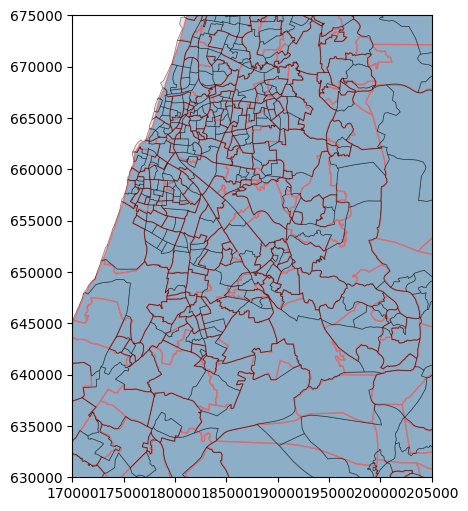

In [ ]:
# Presentation of the Zones  and  Density job zones in the Tel Aviv metropolis

fig, ax = plt.subplots(1, figsize =(6,6))
Density_jobs.plot(ax=ax, edgecolor = 'red', alpha=0.8)
zones.plot(ax=ax, color ='#CCCCCC', edgecolor = 'black', linewidth = 0.5, alpha=0.5)
ax.set_xlim([170000, 205000])
ax.set_ylim([630000, 675000])

##### Calculate Density_jobs for each zone

In [ ]:
# Creating a matrix of joint areas: ZONE between Density_jobs

Zone_Density_jobs_area =     Density_jobs.geometry.apply(lambda x: zones.intersection(x , align=False).area )
Zone_Density_jobs_area


,0,1,2,3,4,5,6,7,8,9,...,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
581,0.0,0.0,0.0,0.0,0.0,75.955121,6477.280748,0.0,0.0,0.0,...,2052.742078,706939.51687,0.0,398329.202896,0.0,0.0,0.0,0.0,0.0,0.0
582,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
583,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Calculation of the total area for joint polygons for each zone
Zone_Density_jobs_area_sum =     Density_jobs[Density_jobs['JOB30_DENS']>0].geometry.apply(lambda x: zones.intersection(x , align=False).area).sum()
print(Zone_Density_jobs_area_sum)

0       1.678831e+06
1       6.166729e+05
2       2.415249e+05
3       1.215536e+06
4       2.050909e+06
            ...     
1265    7.710519e+05
1266    2.990848e+06
1267    2.684716e+05
1268    1.237280e+05
1269    5.378194e+05
Length: 1270, dtype: float64


In [ ]:
# Calculate the average job density for each zone
Zone_Density_jobs_area_T= Zone_Density_jobs_area.T
Zone_Density_jobs_avg =     Zone_Density_jobs_area_T.dot(Density_jobs['JOB30_DENS'])/Zone_Density_jobs_area_sum
Zone_Density_jobs_avg


0       5743.258896
1       2655.573163
2       4066.506737
3       4046.273232
4       9810.219812
           ...     
1265    6211.313765
1266     530.322421
1267    3755.442095
1268    8433.000000
1269    8441.024104
Length: 1270, dtype: float64

In [ ]:
zones['Density_jobs']= Zone_Density_jobs_avg
zones

,TAZ_1270,TAZ_250,TAZ_33,TAZ_15,AREA,geometry,LRT_Distance,TMA_Distance,MotoRate,Density_jobs
0,100289,2000135,300024,40000010,1678765.0,"POLYGON ((189199.490 647447.099, 189177.763 64...",7956.396150,0.000000,384.908501,5743.258896
1,100288,2000135,300024,40000010,616651.0,"POLYGON ((189774.482 648084.239, 189676.970 64...",9720.506931,300.055185,107.447514,2655.573163
2,100287,2000125,300023,40000010,241514.0,"POLYGON ((183013.975 642214.051, 183015.433 64...",12682.106705,0.000000,589.545448,4066.506737
3,100286,2000125,300023,40000010,1215478.0,"POLYGON ((182537.693 641524.481, 182521.968 64...",11898.468936,0.000000,589.185157,4046.273232
4,100047,2000173,300019,40000008,2050799.0,"POLYGON ((179454.925 661641.594, 179474.747 66...",0.000000,0.000000,313.021738,9810.219812
...,...,...,...,...,...,...,...,...,...,...
1265,100272,2000122,300023,40000010,771013.0,"POLYGON ((181342.115 646005.529, 181385.150 64...",8302.450290,21.261005,511.965646,6211.313765
1266,100271,2000103,300022,40000010,2990713.0,"POLYGON ((183358.912 650237.049, 183344.359 65...",3637.050416,0.000000,476.943701,530.322421
1267,100032,2000169,300019,40000008,268459.0,"POLYGON ((180830.174 666511.743, 180872.096 66...",277.684699,276.609962,336.281496,3755.442095
1268,100031,2000169,300019,40000008,123722.0,"POLYGON ((180197.100 665238.800, 180197.196 66...",91.951601,89.413540,521.000000,8433.000000


###### Calculation Test

In [ ]:
# Test
col_to_test = 5
Zone_Density_jobs_area
column = Zone_Density_jobs_area.loc[:, col_to_test]
filtered_rows = Zone_Density_jobs_area[column > 0]
filtered_rows_list = filtered_rows.index.tolist()
print(f'the areas of joint polygon # {col_to_test} in frame ZONES  and polygons in frame Density_jobs:\n{filtered_rows[col_to_test]}')
print("="*20)
sum_column = filtered_rows[col_to_test].sum()
print(f'sum area in polygon #{col_to_test} in frame ZONES: {sum_column}')
print("="*20)
print(f'list of polygons in frame Density_jobs :{filtered_rows_list}')
print("="*20)
print(f'Density_jobs in polygons than joints with polygon # {col_to_test} in frame ZONES:\n{Density_jobs[["OBJECTID","JOB30_DENS"]].loc[filtered_rows_list]["JOB30_DENS"]}')
total = (filtered_rows[col_to_test]*Density_jobs.loc[filtered_rows_list]['JOB30_DENS']/sum_column).sum()
print("="*20)
print(f'avarage value of Density_jobs in polygon # {col_to_test} in frame ZONES: {total}')
print("="*20)
zones.loc[col_to_test, 'Density_jobs']

if round(zones.loc[col_to_test, 'Density_jobs'],2) == round(total,2):
    print ("TEST = OK")
else:
    print (f"TEST = Fails : {zones.loc[col_to_test, 'Density_jobs']} != {total} ")

the areas of joint polygon # 5 in frame ZONES  and polygons in frame Density_jobs:
361    230438.030836
386       426.389155
388       884.376871
390    214542.769086
581        75.955121
Name: 5, dtype: float64
sum area in polygon #5 in frame ZONES: 446367.52106939344
list of polygons in frame Density_jobs :[361, 386, 388, 390, 581]
Density_jobs in polygons than joints with polygon # 5 in frame ZONES:
361     9818.0
386     3273.0
388    32187.0
390     7235.0
581    27194.0
Name: JOB30_DENS, dtype: float64
avarage value of Density_jobs in polygon # 5 in frame ZONES: 8617.526753513697
TEST = OK


### **2.7  Data and geodata of all industrial zones in Israel - Industrial Index**

##### Load the Industrial Index data

In [ ]:
# source of data: https://data.gov.il/dataset/industrial

Industrial_Zones = gpd.read_file(path + '/Data/Industrial/INDUSTRIAL.shp')
print(Industrial_Zones.shape)
Industrial_Zones.head(2)

(427, 14)


,TABA_NUM,NAME,CITY,DISTRICT,MINORITY,OWNER,INDNETAREA,EMPNETAREA,BRUTOAREA,YEARMONTH,AUTHORITY,Shape_Leng,Shape_Area,geometry
0,5207/ג,גוש חלב,None,צפון,מיעוטים כללי,None,40501,0,99638,202201,גוש חלב (ג'יש),1579.603451,99639.790359,"POLYGON ((242531.766 769534.125, 242555.344 76..."
1,31/ג/במ,גן-נר,גן נר,צפון,None,None,39039,0,39037,202201,הגלבוע,793.614911,39037.507820,"POLYGON ((231096.266 715384.000, 231053.875 71..."


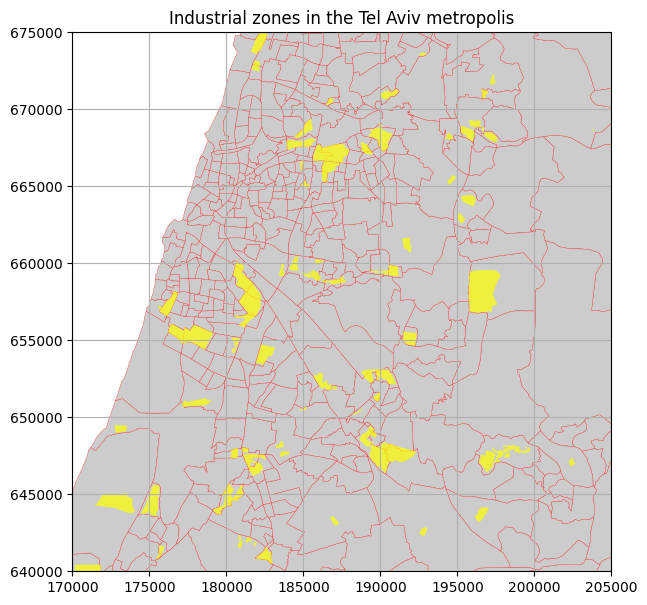

In [ ]:
# Presentation of  Zones  and  Industrial zones in the Tel Aviv metropolis

fig, ax = plt.subplots(1, figsize =(7,7))
zones.plot(ax=ax, color ='#CCCCCC', edgecolor = '#FF0000', linewidth = 0.2)
# rakevet_kala.plot(ax=ax, color ='green', markersize=50, alpha=0.5)
Industrial_Zones.plot(ax=ax, color ='yellow', alpha=0.7)

ax.set_xlim([170000, 205000])
ax.set_ylim([640000, 675000])
ax.set_title('Industrial zones in the Tel Aviv metropolis')

ax.grid(True)
plt.show()


##### Calculation of the distance to the nearest IndustrialZones

In [ ]:
zones['Industrial_Distance'] = zones.geometry.apply(lambda x: Industrial_Zones.distance(x).min())
zones.head(2)

,TAZ_1270,TAZ_250,TAZ_33,TAZ_15,AREA,geometry,LRT_Distance,TMA_Distance,MotoRate,Density_jobs,Industrial_Distance
0,100289,2000135,300024,40000010,1678765.0,"POLYGON ((189199.490 647447.099, 189177.763 64...",7956.396150,0.000000,384.908501,5743.258896,119.127787
1,100288,2000135,300024,40000010,616651.0,"POLYGON ((189774.482 648084.239, 189676.970 64...",9720.506931,300.055185,107.447514,2655.573163,0.000000


### **2.8  Statistical data for each zone in Israel - Statistical data**

##### Load the Statistical data of the zones

In [ ]:
# source of data: https://data.gov.il/dataset/tripscelular_1819

file_name = path + '/Data/celular1819_v1.3/celular1819_statistical_data_v01_utf-8.csv'
statistical_data_zones = pd.read_csv(file_name, encoding='cp1252')
statistical_data_zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 84 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Area 1270                                          1270 non-null   int64  
 1   1270 model area                                    1270 non-null   int64  
 2   Linked to model-area model layer 250               1270 non-null   int64  
 3   Linked to the main area-model layer (33)           1270 non-null   int64  
 4   linked to the model-area layer on (15)             1270 non-null   int64  
 5   Source model                                       1270 non-null   object 
 6   Source model_ENG                                   1270 non-null   object 
 7   Symbol of a settlement/local authority             1238 non-null   object 
 8   Number of polygons from 2640                       1270 non-null   int64  
 9   Municipa

In [ ]:
# From the dataset we will take only 8 necessary columns and only rows with data (1270 rows)
stat_data_zones = statistical_data_zones.iloc[:1270, [0, 10, 22, 57, 59, 78, 79, 81, 83]]
stat_data_zones.columns = ['Area_1270', 'Municipality', 'Population', 'Average_age', 'Level_ultra-Orthodox', 'Land_use', 'Workers','Area_m2','Socio_Economic_Index']
stat_data_zones

,Area_1270,Municipality,Population,Average_age,Level_ultra-Orthodox,Land_use,Workers,Area_m2,Socio_Economic_Index
0,100001,Gezer Regional Council,"4,056",26.0,NaN,residence,"1,984","7,654,048",NaN
1,100002,Tel Aviv Jaffa,"8,940",37.0,NaN,Employment + residence,"5,121","859,716",8.0
2,100003,Tel Aviv Jaffa,0,NaN,NaN,Airport and power station,0,"2,284,407",8.0
3,100004,Tel Aviv Jaffa,"6,114",40.0,NaN,Employment + residence,"3,075","2,782,156",8.0
4,100005,Tel Aviv Jaffa,"19,044",37.0,NaN,residence,"9,314","1,615,395",8.0
...,...,...,...,...,...,...,...,...,...
1265,101266,REHOVOT,0,NaN,NaN,industry,0,"1,783,183",7.0
1266,101267,Kfar Saba,0,NaN,NaN,industry,0,"347,842",8.0
1267,101268,Ramla,0,NaN,NaN,residence,0,"2,912,327",5.0
1268,101269,Ness Ziona,0,NaN,NaN,Industry and trade,0,"828,795",8.0


In [ ]:
stat_data_zones['Area_1270'] = stat_data_zones['Area_1270'].astype(int)
stat_data_zones['Municipality'] = stat_data_zones['Municipality'].astype(str)
stat_data_zones['Population'] = stat_data_zones['Population'].str.replace(',', '').astype(float)
stat_data_zones['Area_m2'] = stat_data_zones['Area_m2'].str.replace(',', '').astype(float)
stat_data_zones['Workers'] = stat_data_zones['Workers'].str.replace(',', '').astype(float)
stat_data_zones.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area_1270             1270 non-null   int64  
 1   Municipality          1270 non-null   object 
 2   Population            1180 non-null   float64
 3   Average_age           989 non-null    float64
 4   Level_ultra-Orthodox  128 non-null    float64
 5   Land_use              1270 non-null   object 
 6   Workers               1242 non-null   float64
 7   Area_m2               1270 non-null   float64
 8   Socio_Economic_Index  941 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 89.4+ KB


In [ ]:
# Calculation of population density per square kilometer
stat_data_zones['Pop_Density_Sqkm'] = stat_data_zones.apply(lambda x: x['Area_m2']/x['Population'] if x['Population']> 0 else 0, axis=1)
stat_data_zones.head(2)

,Area_1270,Municipality,Population,Average_age,Level_ultra-Orthodox,Land_use,Workers,Area_m2,Socio_Economic_Index,Pop_Density_Sqkm
0,100001,Gezer Regional Council,4056.0,26.0,NaN,residence,1984.0,7654048.0,NaN,1887.092702
1,100002,Tel Aviv Jaffa,8940.0,37.0,NaN,Employment + residence,5121.0,859716.0,8.0,96.165101


##### combine data from two dataframes

In [ ]:
# Combining two datasets: stat_data_zones and Zones in one dataset zones_1270
zones_1270 = pd.merge(zones, stat_data_zones, left_on='TAZ_1270', right_on='Area_1270')
zones_1270.drop(['AREA','Area_1270'], axis=1, inplace=True)


In [ ]:
zones_1270.head()



,TAZ_1270,TAZ_250,TAZ_33,TAZ_15,geometry,LRT_Distance,TMA_Distance,MotoRate,Density_jobs,Industrial_Distance,Municipality,Population,Average_age,Level_ultra-Orthodox,Land_use,Workers,Area_m2,Socio_Economic_Index,Pop_Density_Sqkm
0,100289,2000135,300024,40000010,"POLYGON ((189199.490 647447.099, 189177.763 64...",7956.396150,0.000000,384.908501,5743.258896,119.127787,Ramla,17045.0,36.0,4.0,residence,7523.0,1678765.0,5.0,98.490173
1,100288,2000135,300024,40000010,"POLYGON ((189774.482 648084.239, 189676.970 64...",9720.506931,300.055185,107.447514,2655.573163,0.000000,Ramla,3328.0,32.0,NaN,Residential + commercial,1757.0,616651.0,5.0,185.291767
2,100287,2000125,300023,40000010,"POLYGON ((183013.975 642214.051, 183015.433 64...",12682.106705,0.000000,589.545448,4066.506737,178.248413,REHOVOT,0.0,NaN,NaN,Hospital,0.0,241514.0,7.0,0.000000
3,100286,2000125,300023,40000010,"POLYGON ((182537.693 641524.481, 182521.968 64...",11898.468936,0.000000,589.185157,4046.273232,0.000000,REHOVOT,2508.0,35.0,NaN,residence,1231.0,1215478.0,7.0,484.640351
4,100047,2000173,300019,40000008,"POLYGON ((179454.925 661641.594, 179474.747 66...",0.000000,0.000000,313.021738,9810.219812,1407.789005,Tel Aviv Jaffa,15613.0,37.0,4.0,Residence + craft + education,8545.0,2050799.0,8.0,131.352014


In [ ]:
zones_1270.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   TAZ_1270              1270 non-null   int64   
 1   TAZ_250               1270 non-null   int64   
 2   TAZ_33                1270 non-null   int64   
 3   TAZ_15                1270 non-null   int64   
 4   geometry              1270 non-null   geometry
 5   LRT_Distance          1270 non-null   float64 
 6   TMA_Distance          1270 non-null   float64 
 7   MotoRate              1260 non-null   float64 
 8   Density_jobs          1260 non-null   float64 
 9   Industrial_Distance   1270 non-null   float64 
 10  Municipality          1270 non-null   object  
 11  Population            1180 non-null   float64 
 12  Average_age           989 non-null    float64 
 13  Level_ultra-Orthodox  128 non-null    float64 
 14  Land_use              1270 non-null   object  
 

In [ ]:
zones_copy = zones_1270.copy()
zones_fill = zones_copy.iloc[:, [0, 7 , 8, 11, 12, 15,17,18]]

### **2.9 Filling in missing data**.

<Axes: >

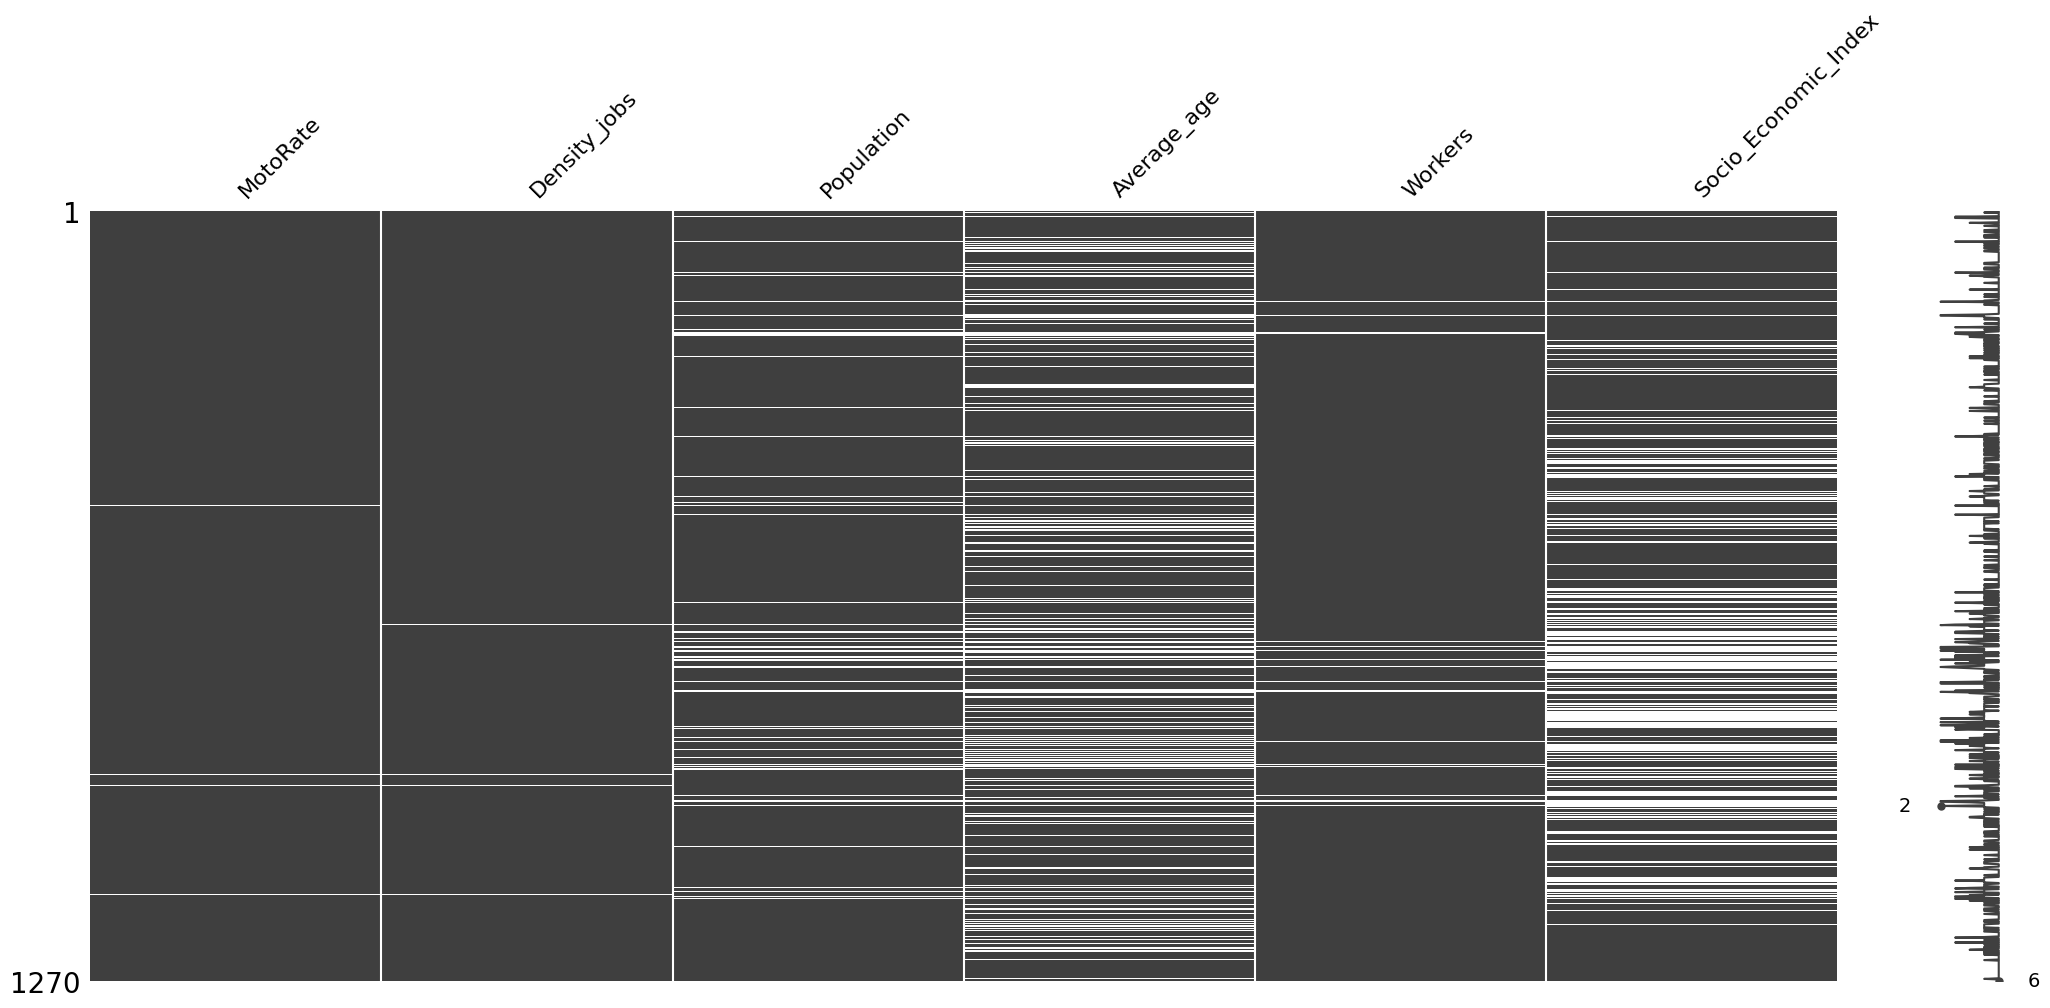

In [ ]:
# !pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = zones_fill.columns[zones_fill.isnull().any()].tolist()
msno.matrix(zones_fill[missingdata_df])

In [ ]:
zones_fill['Population'].fillna(0, inplace = True)
zones_fill['MotoRate'].fillna(0, inplace = True)
zones_fill['Density_jobs'].fillna(0, inplace = True)
zones_fill['Average_age'].fillna(0, inplace = True)
zones_fill['Workers'].fillna(0, inplace = True)
zones_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TAZ_1270              1270 non-null   int64  
 1   MotoRate              1270 non-null   float64
 2   Density_jobs          1270 non-null   float64
 3   Population            1270 non-null   float64
 4   Average_age           1270 non-null   float64
 5   Workers               1270 non-null   float64
 6   Socio_Economic_Index  941 non-null    float64
 7   Pop_Density_Sqkm      1270 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 79.5 KB


<ipython-input-43-7fca14b2cea0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zones_fill['Population'].fillna(0, inplace = True)
<ipython-input-43-7fca14b2cea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zones_fill['MotoRate'].fillna(0, inplace = True)
<ipython-input-43-7fca14b2cea0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zones_fill['Density_jobs'].fillna(0, inplace = True)
<ipython-input-43-7fca14b2cea0>:4: SettingW

### **2.10 Filling missing data for the socio-economic index using kNN imputation.**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create a regressor with 3 nearest neighbors:
reg = KNeighborsRegressor(n_neighbors=3)

# Split the data into training and test sets:
# Split it into training data (where Socio_Economic_Index is known) and test data (where Socio_Economic_Index is missing):

train_data = zones_fill.dropna(subset=['Socio_Economic_Index'])
train_data['source_SEI'] = 1
test_data = zones_fill[zones_fill['Socio_Economic_Index'].isnull()]
test_data['source_SEI'] = 0

# Train the model on the training data:
X_train = train_data[['MotoRate', 'Density_jobs', 'Population', 'Average_age', 'Workers', 'Pop_Density_Sqkm']]
y_train = train_data['Socio_Economic_Index']
reg.fit(X_train, y_train)

# Predict Socio_Economic_Index values for test data:
X_test = test_data[['MotoRate', 'Density_jobs', 'Population', 'Average_age', 'Workers', 'Pop_Density_Sqkm']]
y_pred = reg.predict(X_test)

# Round predicted values to whole numbers:
y_pred = y_pred.round().astype(int)

print(len(y_pred))

test_data

329


<ipython-input-44-61369bdad41a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['source_SEI'] = 1
<ipython-input-44-61369bdad41a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['source_SEI'] = 0


,TAZ_1270,MotoRate,Density_jobs,Population,Average_age,Workers,Socio_Economic_Index,Pop_Density_Sqkm,source_SEI
9,101103,400.038415,203.102640,0.0,0.0,0.0,NaN,0.000000,0
11,101102,398.998866,220.987092,0.0,0.0,0.0,NaN,0.000000,0
50,101115,336.001165,2033.970344,0.0,0.0,0.0,NaN,0.000000,0
87,100753,361.000224,767.412662,389.0,19.0,142.0,NaN,1586.329049,0
101,101137,331.485388,346.997563,0.0,0.0,0.0,NaN,0.000000,0
...,...,...,...,...,...,...,...,...,...
1177,100243,366.167081,189.393537,1903.0,30.0,901.0,NaN,1907.367840,0
1179,100242,328.771495,187.396347,4859.0,29.0,2347.0,NaN,2458.314056,0
1187,100001,363.964381,134.894251,4056.0,26.0,1984.0,NaN,1887.092702,0
1197,100498,337.903700,2570.608183,0.0,0.0,0.0,NaN,0.000000,0


In [ ]:
# Fill in missing values in Socio_Economic_Index:
test_data['Socio_Economic_Index'] = y_pred

# Merge the updated test data with the original data:
Socio_Economic_Index_data = pd.concat([train_data, test_data])
Socio_Economic_Index_data

<ipython-input-45-c8718b4e01d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Socio_Economic_Index'] = y_pred


,TAZ_1270,MotoRate,Density_jobs,Population,Average_age,Workers,Socio_Economic_Index,Pop_Density_Sqkm,source_SEI
0,100289,384.908501,5743.258896,17045.0,36.0,7523.0,5.0,98.490173,1
1,100288,107.447514,2655.573163,3328.0,32.0,1757.0,5.0,185.291767,1
2,100287,589.545448,4066.506737,0.0,0.0,0.0,7.0,0.000000,1
3,100286,589.185157,4046.273232,2508.0,35.0,1231.0,7.0,484.640351,1
4,100047,313.021738,9810.219812,15613.0,37.0,8545.0,8.0,131.352014,1
...,...,...,...,...,...,...,...,...,...
1177,100243,366.167081,189.393537,1903.0,30.0,901.0,2.0,1907.367840,0
1179,100242,328.771495,187.396347,4859.0,29.0,2347.0,5.0,2458.314056,0
1187,100001,363.964381,134.894251,4056.0,26.0,1984.0,5.0,1887.092702,0
1197,100498,337.903700,2570.608183,0.0,0.0,0.0,7.0,0.000000,0


#### Let's put the completed socio-economic index data into our dataset: zones_1270.

In [ ]:
# Combining data from traveler surveys and data  zone A (fromZone)
merged_zones_1270 = pd.merge( zones_1270, Socio_Economic_Index_data[['TAZ_1270','Socio_Economic_Index']], left_on='TAZ_1270', right_on='TAZ_1270', how='left')
merged_zones_1270.head(2)

,TAZ_1270,TAZ_250,TAZ_33,TAZ_15,geometry,LRT_Distance,TMA_Distance,MotoRate,Density_jobs,Industrial_Distance,Municipality,Population,Average_age,Level_ultra-Orthodox,Land_use,Workers,Area_m2,Socio_Economic_Index_x,Pop_Density_Sqkm,Socio_Economic_Index_y
0,100289,2000135,300024,40000010,"POLYGON ((189199.490 647447.099, 189177.763 64...",7956.396150,0.000000,384.908501,5743.258896,119.127787,Ramla,17045.0,36.0,4.0,residence,7523.0,1678765.0,5.0,98.490173,5.0
1,100288,2000135,300024,40000010,"POLYGON ((189774.482 648084.239, 189676.970 64...",9720.506931,300.055185,107.447514,2655.573163,0.000000,Ramla,3328.0,32.0,NaN,Residential + commercial,1757.0,616651.0,5.0,185.291767,5.0


In [ ]:
merged_zones_1270 = merged_zones_1270.drop(columns=[ 'Socio_Economic_Index_x'])

merged_zones_1270 = merged_zones_1270.rename(columns={
                                                         'Socio_Economic_Index_y': 'Socio_Economic_Index'
                                                      })
zones_1270 = merged_zones_1270

In [ ]:
zones_1270.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   TAZ_1270              1270 non-null   int64   
 1   TAZ_250               1270 non-null   int64   
 2   TAZ_33                1270 non-null   int64   
 3   TAZ_15                1270 non-null   int64   
 4   geometry              1270 non-null   geometry
 5   LRT_Distance          1270 non-null   float64 
 6   TMA_Distance          1270 non-null   float64 
 7   MotoRate              1260 non-null   float64 
 8   Density_jobs          1260 non-null   float64 
 9   Industrial_Distance   1270 non-null   float64 
 10  Municipality          1270 non-null   object  
 11  Population            1180 non-null   float64 
 12  Average_age           989 non-null    float64 
 13  Level_ultra-Orthodox  128 non-null    float64 
 14  Land_use              1270 non-null   object  
 

### **2.11  Distance calculation - distance between each pair of zones**

In [ ]:

# Get the centroids of each zone
centroids = zones_1270.geometry.centroid

# Create a dictionary to store the distances between each pair of zones
N_points = len(centroids)
dist_matrix = np.zeros((N_points,N_points), dtype=int)



In [ ]:
# calculate the distance between two points

def calculate_distance(x1, y1, x2, y2):
        return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

# Calculate the distance between each pair of zones
for i in range(len(centroids)):
    for j in range(len(centroids)):
        # Get the coordinates of the two zones
        x1, y1 = centroids.iloc[i].x, centroids.iloc[i].y
        x2, y2 = centroids.iloc[j].x, centroids.iloc[j].y
        dist_matrix[i, j] = calculate_distance(x1, y1, x2, y2)

In [ ]:
# Creating a dataframe of distances between each zone to each zone
list_col = zones_1270['TAZ_1270'].tolist()
zones_dist = pd.DataFrame(dist_matrix, columns = list_col )
zones_dist.index= list_col
zones_dist.head(5)

,100289,100288,100287,100286,100047,100046,100045,100281,100044,101103,...,100039,100038,100274,100037,100273,100272,100271,100032,100031,100030
100289,0,2329,7969,8042,15601,16365,16826,7418,15521,70163,...,16999,17400,5585,17222,5063,6795,4665,18723,18195,18455
100288,2329,0,9545,9724,16953,17593,18167,9186,17014,70654,...,18477,18667,7819,18420,7219,9001,6725,19621,19206,19516
100287,7969,9545,0,576,19928,21007,21080,1103,19380,63058,...,20769,21841,4540,21888,4116,4183,9040,24097,23310,23422
100286,8042,9724,576,0,19551,20644,20693,746,18978,63288,...,20357,21463,4212,21523,3878,3738,8805,23772,22970,23071
100047,15601,16953,19928,19551,0,1274,1225,18842,1240,82216,...,1866,1913,15401,2053,15955,15854,11497,4893,3830,3735


In [ ]:
# Saving the DataFrame to a *.pkl file in the PC Drive folder.

# zones_dist.to_pickle("zones_dist.pkl")

##### Loading the pkl file to Geoframe

In [ ]:
# zones_dist = pd.read_pickle(path + 'zones_dist.pkl')

In [ ]:
# Getting a separate FromZone column from the Index number
zones_dist.reset_index(inplace=True)
zones_dist = zones_dist.rename(columns={'index': 'FromZone'})
zones_dist

,FromZone,100289,100288,100287,100286,100047,100046,100045,100281,100044,...,100039,100038,100274,100037,100273,100272,100271,100032,100031,100030
0,100289,0,2329,7969,8042,15601,16365,16826,7418,15521,...,16999,17400,5585,17222,5063,6795,4665,18723,18195,18455
1,100288,2329,0,9545,9724,16953,17593,18167,9186,17014,...,18477,18667,7819,18420,7219,9001,6725,19621,19206,19516
2,100287,7969,9545,0,576,19928,21007,21080,1103,19380,...,20769,21841,4540,21888,4116,4183,9040,24097,23310,23422
3,100286,8042,9724,576,0,19551,20644,20693,746,18978,...,20357,21463,4212,21523,3878,3738,8805,23772,22970,23071
4,100047,15601,16953,19928,19551,0,1274,1225,18842,1240,...,1866,1913,15401,2053,15955,15854,11497,4893,3830,3735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,100272,6795,9001,4183,3738,15854,16968,16983,3081,15254,...,16624,17763,1228,17844,1809,0,5667,20170,19334,19415
1266,100271,4665,6725,9040,8805,11497,12423,12711,8058,11230,...,12703,13377,4694,13306,4930,5667,0,15238,14541,14716
1267,100032,18723,19621,24097,23772,4893,3620,4323,23041,6024,...,5551,3527,19564,2988,20016,20170,15238,0,1118,1489
1268,100031,18195,19206,23310,22970,3830,2558,3205,22244,4929,...,4434,2410,18771,1875,19252,19334,14541,1118,0,532


##### Test  the calculation of the distance between points using Google Maps

In [ ]:
zones_1270["centroid"] = zones_1270.centroid
zones_1270['X'] = zones_1270.centroid.x
zones_1270['Y'] = zones_1270.centroid.y
zones_1270.head(3)

,TAZ_1270,TAZ_250,TAZ_33,TAZ_15,geometry,LRT_Distance,TMA_Distance,MotoRate,Density_jobs,Industrial_Distance,...,Average_age,Level_ultra-Orthodox,Land_use,Workers,Area_m2,Pop_Density_Sqkm,Socio_Economic_Index,centroid,X,Y
0,100289,2000135,300024,40000010,"POLYGON ((189199.490 647447.099, 189177.763 64...",7956.396150,0.000000,384.908501,5743.258896,119.127787,...,36.0,4.0,residence,7523.0,1678765.0,98.490173,5.0,POINT (187430.264 648561.044),187430.264015,648561.044475
1,100288,2000135,300024,40000010,"POLYGON ((189774.482 648084.239, 189676.970 64...",9720.506931,300.055185,107.447514,2655.573163,0.000000,...,32.0,NaN,Residential + commercial,1757.0,616651.0,185.291767,5.0,POINT (189760.144 648580.260),189760.143886,648580.260353
2,100287,2000125,300023,40000010,"POLYGON ((183013.975 642214.051, 183015.433 64...",12682.106705,0.000000,589.545448,4066.506737,178.248413,...,NaN,NaN,Hospital,0.0,241514.0,0.000000,7.0,POINT (182724.824 642129.522),182724.824064,642129.521927


###### Test

In [ ]:
# Convert GPS coordinates

from pyproj import Transformer


TRAN_2039_TO_4326 = Transformer.from_crs("EPSG:2039", "EPSG:4326")

def transform_EPSG(lat, lon):
  return TRAN_2039_TO_4326.transform(lat, lon)

x0 , y0 = transform_EPSG(zones_1270.iat[0, -2], zones_1270.iat[0, -1])
print('Point : Israel coordinates (EPSG:2039) ==> GPS coordinates (EPSG:4326)')
print(f' A: ({zones_1270.iat[0, -2]}, {zones_1270.iat[0, -1]}) ==> ({x0} , {y0})')
x1 , y1 = transform_EPSG(zones_1270.iat[1, -2], zones_1270.iat[1, -1])
print(f' B:({zones_1270.iat[1, -2]}, {zones_1270.iat[1, -1]}) ==> ({x1} , {y1})')
x2 , y2 = transform_EPSG(zones_1270.iat[2, -2], zones_1270.iat[2, -1])
print(f' C: ({zones_1270.iat[2, -2]}, {zones_1270.iat[2, -1]}) ==> ({x2} , {y2})')

Point : Israel coordinates (EPSG:2039) ==> GPS coordinates (EPSG:4326)
 A: (187430.26401509627, 648561.0444751293) ==> (31.92959162429551 , 34.86577965728781)
 B:(189760.14388624099, 648580.260353365) ==> (31.929828197831625 , 34.89041616943835)
 C: (182724.82406353258, 642129.5219270004) ==> (31.871449590500116 , 34.81626612178574)


In [ ]:
# The distance between points
A = zones_1270.iat[0, 0] # 100289
B = zones_1270.iat[1, 0] # 100288
C = zones_1270.iat[2, 0] # 100287

# testA-C = zones_dist[zones_dist['index']==A ].loc[:, [C]]
# testB-C = zones_dist[zones_dist['index']==B ].loc[:, [C]]

print(f"from A({A})-B({B}) : {zones_dist[zones_dist['FromZone']==A ].at[0,B]} meters")
print(f"from A({A})-C({C}) : {zones_dist[zones_dist['FromZone']==A ].at[0,C]} meters")
print(f"from B({B})-C({C}) : {zones_dist[zones_dist['FromZone']==B ].at[1,C]} meters")
print(f"from A->B->C : {zones_dist[zones_dist['FromZone']==A ].at[0,B] + zones_dist[zones_dist['FromZone']==B ].at[1,C] + zones_dist[zones_dist['FromZone']==C ].at[2,A]} meters")


from A(100289)-B(100288) : 2329 meters
from A(100289)-C(100287) : 7969 meters
from B(100288)-C(100287) : 9545 meters
from A->B->C : 19843 meters


In [ ]:
# https://www.google.com/maps/dir/31.92959162429551+,+34.86577965728781/31.929828197831625+,+34.890416169438346/31.871449590500124+,+34.816266121785745/@31.90328,34.8123438,13z/data=!3m1!4b1!4m14!4m13!1m3!2m2!1d34.8657797!2d31.9295916!1m3!2m2!1d34.8904162!2d31.9298282!1m3!2m2!1d34.8162661!2d31.8714496!3e0?entry=ttu
from PIL import Image

img = Image.open(path + 'Data/Distance_A-B-C_01.JPG')
img.show()


### **2.12.1  Distance calculation - distance between TA center to each zones**

In [ ]:
# Get the centroids of each zone
centroids = zones_1270.geometry.centroid

# Find the coordinates of the center of Tel Aviv.
index_of_CenterTA = zones_1270[zones_1270['TAZ_1270'] == 100031].index[0]
x2, y2 = centroids.iloc[index_of_CenterTA].x, centroids.iloc[index_of_CenterTA].y
print(f'Coordinates of the center of Tel Aviv {x2}, {y2}')

# Create a dictionary to store the distances between TA center to each zones
N_points = len(centroids)
dist_matrix_TA = np.zeros((N_points,1), dtype=int)


Coordinates of the center of Tel Aviv 180339.9467769876, 665318.1988168438


In [ ]:
# calculate the distance between two points

def calculate_distance(x1, y1, x2, y2):
        return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

# Calculate the distance between TA center to each zones
for i in range(len(centroids)):
      x1, y1 = centroids.iloc[i].x, centroids.iloc[i].y
      dist_matrix_TA[i, 0] = calculate_distance(x1, y1, x2, y2)



In [ ]:

list_col = zones_1270['TAZ_1270'].tolist()
print(dist_matrix_TA.shape)
print(len(list_col))


(1270, 1)
1270


In [ ]:
# Creating a dataframe of distances between TA center to each zones

TA_zones_dist = pd.DataFrame(dist_matrix_TA )
TA_zones_dist.index= list_col
# Getting a separate FromZone column from the Index number
TA_zones_dist.reset_index(inplace=True)
TA_zones_dist = TA_zones_dist.rename(columns={'index': 'FromZone', TA_zones_dist.columns[1]: 'Dist_to_CenterTA'})

TA_zones_dist[(TA_zones_dist['FromZone']==100039) | (TA_zones_dist['FromZone']==100289)]

,FromZone,Dist_to_CenterTA
0,100289,18195
1260,100039,4434


### **2.13  The Survey of traveling passengers by hour and from each zone to each zone in Israel**

In [ ]:
# Load the Survey traveling passengers data
# source of data: https://data.gov.il/dataset/tripscelular_1819


path_travel_data = path + "/Data/celular1819_v1.3/AvgDayHourlyTrips201819_1270_weekday_v1.csv"
travel_data_all = pd.read_csv(path_travel_data)



Randomly select 99% of rows in a dataframe: travel_data

In [ ]:
# For the model we take 99% of the data.
travel_data = travel_data_all.sample(frac=0.99)

print(travel_data.shape)

(1506482, 26)


In [ ]:
# Add a distance column to the DataFrame travel_data
travel_data['Distance_A_B'] = travel_data.apply(lambda row: zones_dist.loc[TA_zones_dist['FromZone'] == row['fromZone'], row['ToZone']].values[0], axis=1)

travel_data


,fromZone,ToZone,h0,h1,h2,h3,h4,h5,h6,h7,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,Distance_A_B
1199047,100522,101092,0.000000,0.000000,0.000000,0.000000,0.170191,0.022592,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113224
371774,101002,101107,0.000000,0.000000,0.000000,0.000000,0.073082,0.016978,0.000000,0.087963,...,0.000000,0.048201,0.000000,0.027756,0.000000,0.000000,0.000000,0.000000,0.000000,169073
591373,100422,100846,0.009280,0.000000,0.000000,0.000000,0.000000,0.000000,0.006096,0.000000,...,0.062137,0.108153,0.153755,0.029190,0.078756,0.032734,0.000000,0.000000,0.000000,63383
1521472,101250,100575,0.147785,0.078107,0.055108,0.052590,0.062292,0.107509,0.188944,0.437245,...,0.414532,0.550051,0.480508,0.393882,0.349655,0.294613,0.215017,0.182106,0.136785,245598
563651,100399,100562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032609,0.032609,...,0.032167,0.053611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149019,100718,100943,0.000000,0.000000,0.000000,0.024675,0.000000,0.007800,0.323826,0.303691,...,0.013754,0.019067,0.014683,0.008259,0.017595,0.000000,0.000000,0.000000,0.008869,34352
775237,100065,100620,0.034590,0.002086,0.001397,0.000000,0.003584,0.002488,0.000000,0.008295,...,0.006929,0.014783,0.019633,0.011087,0.008951,0.017903,0.036800,0.019116,0.003398,53442
1401586,101141,100338,0.025706,0.016050,0.000000,0.052979,0.198874,0.464835,0.996941,0.349329,...,0.023255,0.163592,0.016696,0.118072,0.021198,0.115904,0.012113,0.085178,0.000000,79888
370444,101001,100637,0.000000,0.000000,0.000000,0.007253,0.073491,0.026747,0.060480,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.054068,0.000000,0.027639,0.000000,109722


In [ ]:
TA_zones_dist.loc[TA_zones_dist['FromZone'] == 100289, 'Dist_to_CenterTA'].values[0]

18195

In [ ]:
# Add a distance column (CenterTA_A) to the DataFrame travel_data
travel_data['Distance_CenterTA_A'] = travel_data.apply(lambda row: TA_zones_dist.loc[TA_zones_dist['FromZone'] == row['fromZone'], 'Dist_to_CenterTA'].values[0], axis=1)

# Add a distance column (CenterTA_B) to the DataFrame travel_data
travel_data['Distance_CenterTA_B'] = travel_data.apply(lambda row: TA_zones_dist.loc[TA_zones_dist['FromZone'] == row['ToZone'], 'Dist_to_CenterTA'].values[0], axis=1)




In [ ]:

travel_data[(travel_data['fromZone'] == 100289) & (travel_data['ToZone'] == 100039)]

,fromZone,ToZone,h0,h1,h2,h3,h4,h5,h6,h7,...,h17,h18,h19,h20,h21,h22,h23,Distance_A_B,Distance_CenterTA_A,Distance_CenterTA_B
1073711,100289,100039,1.208692,0.471325,0.623417,1.272922,2.795077,3.672343,7.467173,9.99519,...,5.692079,6.848796,7.56882,7.167921,5.763303,3.69819,2.508555,16999,18195,4434


In [ ]:
# Counting the number of travelers from each zone to each zone during morning rush hour (6 am to 9 am)

travel_data['Morning_rush_6_9']= travel_data['h6'] + travel_data['h7'] + travel_data['h8']
travel_data

,fromZone,ToZone,h0,h1,h2,h3,h4,h5,h6,h7,...,h18,h19,h20,h21,h22,h23,Distance_A_B,Distance_CenterTA_A,Distance_CenterTA_B,Morning_rush_6_9
1199047,100522,101092,0.000000,0.000000,0.000000,0.000000,0.170191,0.022592,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113224,54858,82450,0.046726
371774,101002,101107,0.000000,0.000000,0.000000,0.000000,0.073082,0.016978,0.000000,0.087963,...,0.027756,0.000000,0.000000,0.000000,0.000000,0.000000,169073,90571,92567,0.228999
591373,100422,100846,0.009280,0.000000,0.000000,0.000000,0.000000,0.000000,0.006096,0.000000,...,0.029190,0.078756,0.032734,0.000000,0.000000,0.000000,63383,20407,83297,0.006096
1521472,101250,100575,0.147785,0.078107,0.055108,0.052590,0.062292,0.107509,0.188944,0.437245,...,0.393882,0.349655,0.294613,0.215017,0.182106,0.136785,245598,281420,51273,1.110595
563651,100399,100562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032609,0.032609,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64987,32676,48525,0.065218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149019,100718,100943,0.000000,0.000000,0.000000,0.024675,0.000000,0.007800,0.323826,0.303691,...,0.008259,0.017595,0.000000,0.000000,0.000000,0.008869,34352,82012,97913,0.650671
775237,100065,100620,0.034590,0.002086,0.001397,0.000000,0.003584,0.002488,0.000000,0.008295,...,0.011087,0.008951,0.017903,0.036800,0.019116,0.003398,53442,10427,45017,0.332957
1401586,101141,100338,0.025706,0.016050,0.000000,0.052979,0.198874,0.464835,0.996941,0.349329,...,0.118072,0.021198,0.115904,0.012113,0.085178,0.000000,79888,76105,16282,1.496162
370444,101001,100637,0.000000,0.000000,0.000000,0.007253,0.073491,0.026747,0.060480,0.000000,...,0.000000,0.000000,0.054068,0.000000,0.027639,0.000000,109722,87350,36934,0.060480


In [ ]:
# Counting the number of travelers from each zone to each zone during the evening rush hour (3am to 6pm)
travel_data['Evening_rush_15_18']= travel_data['h15'] + travel_data['h16'] + travel_data['h17']
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1506482 entries, 1199047 to 358030
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   fromZone             1506482 non-null  int64  
 1   ToZone               1506482 non-null  int64  
 2   h0                   1506482 non-null  float64
 3   h1                   1506482 non-null  float64
 4   h2                   1506482 non-null  float64
 5   h3                   1506482 non-null  float64
 6   h4                   1506482 non-null  float64
 7   h5                   1506482 non-null  float64
 8   h6                   1506482 non-null  float64
 9   h7                   1506482 non-null  float64
 10  h8                   1506482 non-null  float64
 11  h9                   1506482 non-null  float64
 12  h10                  1506482 non-null  float64
 13  h11                  1506482 non-null  float64
 14  h12                  1506482 non-null  float64
 15

### **2.14 Combining traveler survey data and zone data**

In [ ]:
zones_1270.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   TAZ_1270              1270 non-null   int64   
 1   TAZ_250               1270 non-null   int64   
 2   TAZ_33                1270 non-null   int64   
 3   TAZ_15                1270 non-null   int64   
 4   geometry              1270 non-null   geometry
 5   LRT_Distance          1270 non-null   float64 
 6   TMA_Distance          1270 non-null   float64 
 7   MotoRate              1260 non-null   float64 
 8   Density_jobs          1260 non-null   float64 
 9   Industrial_Distance   1270 non-null   float64 
 10  Municipality          1270 non-null   object  
 11  Population            1180 non-null   float64 
 12  Average_age           989 non-null    float64 
 13  Level_ultra-Orthodox  128 non-null    float64 
 14  Land_use              1270 non-null   object  
 

In [ ]:
# Combining data from traveler surveys and data  zone A (fromZone)
merged_df_from = pd.merge(travel_data, zones_1270, left_on='fromZone', right_on='TAZ_1270', how='left')
merged_df_from = merged_df_from.drop(columns=[ 'TAZ_250', 'TAZ_33', 'TAZ_15'])

# Rename data for zone A
merged_df_from = merged_df_from.rename(columns={'TAZ_1270': 'TAZ_1270_A',
                                      'geometry': 'geometry_A',
                                      'LRT_Distance': 'LRT_Distance_A',
                                      'TMA_Distance': 'TMA_Distance_A',
                                      'MotoRate': 'MotoRate_A',
                                      'Density_jobs': 'Density_jobs3_A',
                                      'Industrial_Distance': 'Industrial_Distance_A',
                                      'Municipality': 'Municipality_A',
                                      'Population': 'Population_A',
                                      'Average_age': 'Average_age_A',
                                      'Level_ultra-Orthodox': 'Level_ultra-Orthodox_A',
                                      'Workers': 'Workers_A',
                                      'Area_m2': 'Area_m2_A',
                                      'Land_use': 'Land_use_A',
                                      'Socio_Economic_Index': 'Socio_Economic_Index_A',
                                      'Pop_Density_Sqkm': 'Pop_Density_Sqkm_A',
                                      'X': 'X_A',
                                      'Y': 'Y_A'
                                     })
merged_df_from.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506482 entries, 0 to 1506481
Data columns (total 50 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   fromZone                1506482 non-null  int64   
 1   ToZone                  1506482 non-null  int64   
 2   h0                      1506482 non-null  float64 
 3   h1                      1506482 non-null  float64 
 4   h2                      1506482 non-null  float64 
 5   h3                      1506482 non-null  float64 
 6   h4                      1506482 non-null  float64 
 7   h5                      1506482 non-null  float64 
 8   h6                      1506482 non-null  float64 
 9   h7                      1506482 non-null  float64 
 10  h8                      1506482 non-null  float64 
 11  h9                      1506482 non-null  float64 
 12  h10                     1506482 non-null  float64 
 13  h11                     1506482 non-null  

In [ ]:
# Combining data from traveler surveys and data  zone B (ToZone)
merged_df = pd.merge(merged_df_from, zones_1270, left_on='ToZone', right_on='TAZ_1270', how='left')

# Erase data centroid, X, Y, geometry
merged_df = merged_df.drop(columns=['TAZ_250', 'TAZ_33', 'TAZ_15', 'geometry', 'geometry_A'])

# Rename data for FROM (zone B)
merged_df = merged_df.rename(columns={'TAZ_1270': 'TAZ_1270_B',
                                      'LRT_Distance': 'LRT_Distance_B',
                                      'TMA_Distance': 'TMA_Distance_B',
                                      'MotoRate': 'MotoRate_B',
                                      'Density_jobs': 'Density_jobs3_B',
                                      'Industrial_Distance': 'Industrial_Distance_B',
                                      'Municipality': 'Municipality_B',
                                      'Population': 'Population_B',
                                      'Average_age': 'Average_age_B',
                                      'Level_ultra-Orthodox': 'Level_ultra-Orthodox_B',
                                      'Land_use': 'Land_use_B',
                                      'Workers': 'Workers_B',
                                      'Area_m2': 'Area_m2_B',
                                      'Socio_Economic_Index': 'Socio_Economic_Index_B',
                                      'Pop_Density_Sqkm': 'Pop_Density_Sqkm_B',
                                      'X': 'X_B',
                                      'Y': 'Y_B'
                                     })
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506482 entries, 0 to 1506481
Data columns (total 67 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   fromZone                1506482 non-null  int64   
 1   ToZone                  1506482 non-null  int64   
 2   h0                      1506482 non-null  float64 
 3   h1                      1506482 non-null  float64 
 4   h2                      1506482 non-null  float64 
 5   h3                      1506482 non-null  float64 
 6   h4                      1506482 non-null  float64 
 7   h5                      1506482 non-null  float64 
 8   h6                      1506482 non-null  float64 
 9   h7                      1506482 non-null  float64 
 10  h8                      1506482 non-null  float64 
 11  h9                      1506482 non-null  float64 
 12  h10                     1506482 non-null  float64 
 13  h11                     1506482 non-null  

In [ ]:
# Define a list of columns that need to be converted to float16
# columns_to_convert = [col for col in merged_df.columns if merged_df[col].dtype == 'float64']
# merged_df[columns_to_convert] = merged_df[columns_to_convert].astype('float32')

# Define a list of columns that need to be converted from object to category
# columns_to_category = [col for col in merged_df.columns if merged_df[col].dtype == 'object']
# merged_df[columns_to_category] = merged_df[columns_to_category].astype('category')


# Define a list of columns that need to be converted from int64 to int16
# columns_to_category = [col for col in merged_df.columns if merged_df[col].dtype == 'object']
# merged_df[columns_to_category] = merged_df[columns_to_category].astype('category')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506482 entries, 0 to 1506481
Data columns (total 67 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   fromZone                1506482 non-null  int64   
 1   ToZone                  1506482 non-null  int64   
 2   h0                      1506482 non-null  float64 
 3   h1                      1506482 non-null  float64 
 4   h2                      1506482 non-null  float64 
 5   h3                      1506482 non-null  float64 
 6   h4                      1506482 non-null  float64 
 7   h5                      1506482 non-null  float64 
 8   h6                      1506482 non-null  float64 
 9   h7                      1506482 non-null  float64 
 10  h8                      1506482 non-null  float64 
 11  h9                      1506482 non-null  float64 
 12  h10                     1506482 non-null  float64 
 13  h11                     1506482 non-null  

### **2.15 Saving complete travel data to a *.pkl file in a folder**

In [ ]:
merged_df.to_pickle("merged_df.pkl")

### **2.14 Saving complete travel data to a *.pkl file in a folder GushDan**


In [ ]:
merged_GushDan_df = merged_df[(merged_df['Distance_CenterTA_A'] <30000) & (merged_df['Distance_CenterTA_B'] <30000) ]

In [ ]:
merged_GushDan_df.to_pickle("merged_GushDan_df.pkl")